In [1]:
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

In [3]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1', names=cols)

In [4]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
pat1 = '@[^ ]+'
pat2 = 'http[^ ]+'
pat3 = 'www.[^ ]+'
pat4 = '#[^ ]+'
pat5 = '[0-9]'

combined_pat = '|'.join((pat1, pat2, pat3, pat4, pat5))

In [9]:
clean_tweet_texts = []
for t in df['text']:
    t = t.lower()
    stripped = re.sub(combined_pat, '', t)
    tokens = word_tokenize(stripped)
    words = [x for x  in tokens if len(x) > 1]
    sentences = " ".join(words)
    negations = re.sub("n't", "not", sentences)
    
    clean_tweet_texts.append(negations)

In [10]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['sentiment'] = df['sentiment'].replace({4:1})

In [11]:
clean_df.head()

,text,sentiment
0,awww that 's bummer you shoulda got david carr...,0
1,is upset that he ca not update his facebook by...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it 's not behaving at all 'm mad why am her...,0


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text         1600000 non-null object
sentiment    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [13]:
neg_tweets = clean_df[clean_df['sentiment']==0]
pos_tweets = clean_df[clean_df['sentiment']==1]

## Plot The First 10 Words Before applying any weighting

In [14]:
# Getting the value count for every word
neg = neg_tweets.text.str.split(expand=True).stack().value_counts()
pos = pos_tweets.text.str.split(expand=True).stack().value_counts()

In [15]:
# Transforming to lists
values_neg = neg.keys().tolist()
counts_neg = neg.tolist()

values_pos = pos.keys().tolist()
counts_pos = pos.tolist()

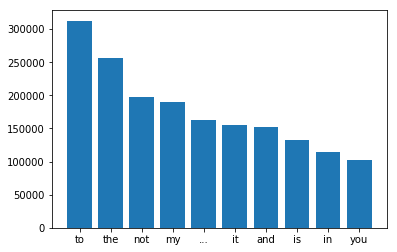

In [16]:
plt.bar(values_neg[0:10], counts_neg[0:10])
plt.show()


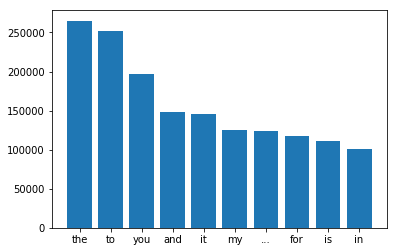

In [17]:
plt.bar(values_pos[0:10], counts_pos[0:10])
plt.show()


## Apply CountVectorizer and then plot

In [18]:
cv = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))

neg_cv = cv.fit_transform(neg_tweets['text'].tolist())
pos_cv = cv.fit_transform(pos_tweets['text'].tolist())


In [19]:
freqs_neg = zip(cv.get_feature_names(), neg_cv.sum(axis=0).tolist()[0])
freqs_pos = zip(cv.get_feature_names(), pos_cv.sum(axis=0).tolist()[0])

In [20]:
list_freq_neg = list(freqs_neg)
list_freq_pos = list(freqs_pos)

In [21]:
list_freq_neg.sort(key=lambda tup: tup[1], reverse=True)
list_freq_pos.sort(key=lambda tup: tup[1], reverse=True)

In [22]:
cv_words_neg = [i[0] for i in list_freq_neg]
cv_counts_neg = [i[1] for i in list_freq_neg]

cv_words_pos = [i[0] for i in list_freq_pos]
cv_counts_pos = [i[1] for i in list_freq_pos]

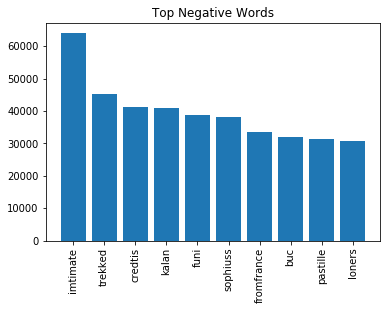

In [23]:
plt.bar(cv_words_neg[0:10], cv_counts_neg[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Negative Words')
plt.show()

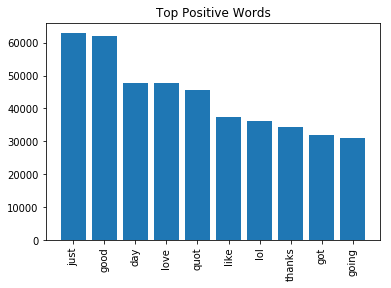

In [24]:
plt.bar(cv_words_pos[0:10], cv_counts_pos[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Positive Words')
plt.show()

## Apply tf-idf vectorizer and then plot

In [25]:
tv = TfidfVectorizer(stop_words='english', binary=False, ngram_range=(1,3))

neg_tv = tv.fit_transform(neg_tweets['text'].tolist())
pos_tv = tv.fit_transform(pos_tweets['text'].tolist())


In [26]:
freqs_neg_tv = zip(tv.get_feature_names(), neg_tv.sum(axis=0).tolist()[0])
freqs_pos_tv = zip(tv.get_feature_names(), pos_tv.sum(axis=0).tolist()[0])
list_freq_neg_tv = list(freqs_neg_tv)
list_freq_pos_tv = list(freqs_pos_tv)

In [27]:
list_freq_neg_tv.sort(key=lambda tup: tup[1], reverse=True)
list_freq_pos_tv.sort(key=lambda tup: tup[1], reverse=True)

In [28]:
cv_words_neg_tv = [i[0] for i in list_freq_neg_tv]
cv_counts_neg_tv = [i[1] for i in list_freq_neg_tv]

cv_words_pos_tv = [i[0] for i in list_freq_pos_tv]
cv_counts_pos_tv = [i[1] for i in list_freq_pos_tv]

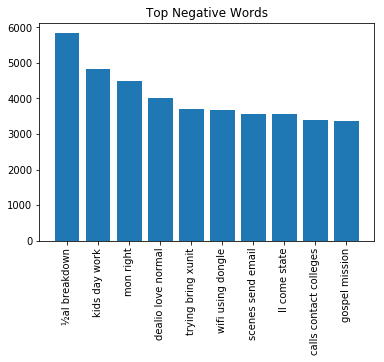

In [29]:
plt.bar(cv_words_neg_tv[0:10], cv_counts_neg_tv[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Negative Words')
plt.show()

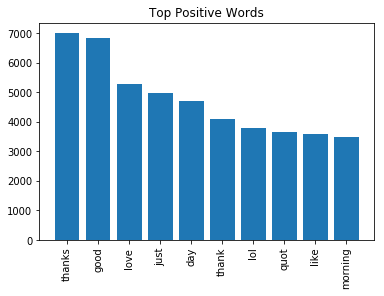

In [30]:
plt.bar(cv_words_pos_tv[0:10], cv_counts_pos_tv[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Positive Words')
plt.show()

## Apply Logistic Regression with CountVectorizer

In [15]:
x = clean_df['text']
y = clean_df['sentiment']


In [22]:
cv = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,3))
x_cv = cv.fit_transform(x)

In [25]:
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(x_cv, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_cv = LogisticRegression() 
log_cv.fit(x_train_cv,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_pred_cv = log_cv.predict(x_test_cv)
confusion_matrix(y_test_cv,y_pred_cv)

array([[122029,  37786],
       [ 30035, 130150]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test_cv,y_pred_cv))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.81      0.79    160185

   micro avg       0.79      0.79      0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



## Apply Logistic Regression With tf-idf

In [16]:
tv = TfidfVectorizer(stop_words='english', binary=False, ngram_range=(1,3))

In [17]:
x_tv = tv.fit_transform(x)

In [18]:
x_train_tv, x_test_tv, y_train_tv, y_test_tv = train_test_split(x_tv, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
log_tv = LogisticRegression() 
log_tv.fit(x_train_tv,y_train_tv)

C:\Users\O.Gamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred_tv = log_tv.predict(x_test_tv)
confusion_matrix(y_test_tv,y_pred_tv)

array([[121193,  38622],
       [ 29563, 130622]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test_tv,y_pred_tv))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.82      0.79    160185

   micro avg       0.79      0.79      0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

